In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

df = pd.read_csv('./data/train.csv')
df['Male'] = df['Gender'].apply(lambda x: True if x == 'Male' else False)
df = df.drop(['Gender', 'id'], axis=1)
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: True if x == 'Yes' else False)
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 2 if x == '> 2 Years' else 1.5 if x=='1-2 Year' else 1)
df['Driving_License'] = df['Driving_License'].apply(lambda x: True if x==1 else False)
df['Previously_Insured'] = df['Previously_Insured'].apply(lambda x: True if x== 1 else False)
df['Response'] = df['Response'].apply(lambda x: True if x== 1 else False)


In [49]:
df.shape

(381109, 11)

In [43]:
df[['Driving_License', 'Previously_Insured']]

,Driving_License,Previously_Insured
0,True,False
1,True,False
2,True,False
3,True,True
4,True,True
...,...,...
381104,True,True
381105,True,True
381106,True,True
381107,True,False


In [44]:
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male
0,44,True,28.0,False,2.0,True,40454.0,26.0,217,True,True
1,76,True,3.0,False,1.5,False,33536.0,26.0,183,False,True
2,47,True,28.0,False,2.0,True,38294.0,26.0,27,True,True
3,21,True,11.0,True,1.0,False,28619.0,152.0,203,False,True
4,29,True,41.0,True,1.0,False,27496.0,152.0,39,False,False


In [45]:
train = df.iloc[:round((len(df)/10*9))]
test = df.iloc[:round((len(df)/10))]

features = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Male', 'Vehicle_Damage']

X_train = train[features]
y_train = train['Response']
X_test = test[features]
y_test = test['Response']


In [46]:
X_train

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Male,Vehicle_Damage
0,44,True,28.0,False,2.0,40454.0,26.0,217,True,True
1,76,True,3.0,False,1.5,33536.0,26.0,183,True,False
2,47,True,28.0,False,2.0,38294.0,26.0,27,True,True
3,21,True,11.0,True,1.0,28619.0,152.0,203,True,False
4,29,True,41.0,True,1.0,27496.0,152.0,39,False,False
...,...,...,...,...,...,...,...,...,...,...
342993,67,True,28.0,True,1.5,39962.0,26.0,154,True,False
342994,22,True,13.0,True,1.0,24967.0,152.0,69,True,True
342995,30,True,47.0,False,1.5,2630.0,16.0,83,True,True
342996,65,True,28.0,False,2.0,50508.0,124.0,214,True,True


In [47]:
y_train

0          True
1         False
2          True
3         False
4         False
          ...  
342993    False
342994    False
342995    False
342996     True
342997    False
Name: Response, Length: 342998, dtype: bool

(array([ 58472.,   5220.,  85915., 112525.,  51912.,  17977.,   6579.,
          2274.,    921.,    495.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

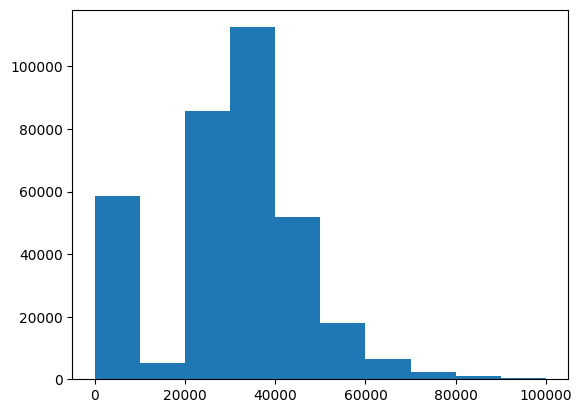

In [48]:
plt.hist(X_train['Annual_Premium'], range=(0,100000))

In [24]:
model = RandomForestClassifier(min_samples_leaf=2, max_features=3)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=3, min_samples_leaf=2)

In [25]:
model.feature_importances_


array([0.14340071, 0.00038951, 0.09929447, 0.07140118, 0.03118246,
       0.22286522, 0.06495401, 0.23983571, 0.01222971, 0.11444702])

In [26]:
feat_importance = pd.DataFrame([features, list(model.feature_importances_)])
feat_importance.transpose().sort_values(1, ascending=False)


,0,1
7,Vintage,0.239836
5,Annual_Premium,0.222865
0,Age,0.143401
9,Vehicle_Damage,0.114447
2,Region_Code,0.099294
3,Previously_Insured,0.071401
6,Policy_Sales_Channel,0.064954
4,Vehicle_Age,0.031182
8,Male,0.01223
1,Driving_License,0.00039


In [28]:
model.score(X_test,y_test)

0.9556296082495868

In [29]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

{'whiskers': [<matplotlib.lines.Line2D at 0x1de000016a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de00001cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de4aad3440>],
 'medians': [<matplotlib.lines.Line2D at 0x1de00002270>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de000025a0>],
 'means': []}

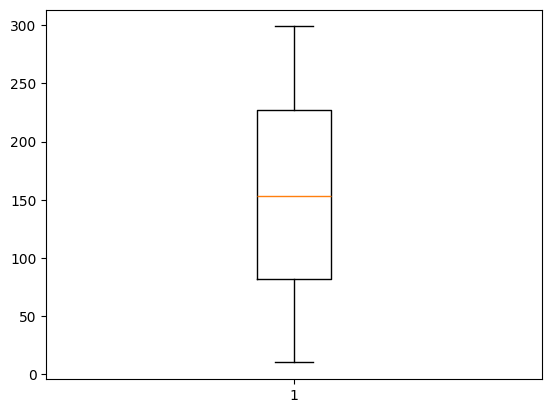

In [30]:
plt.boxplot(test['Vintage'])

In [31]:
len(test.loc[(test['Vintage'] > 10) & (test['Response'] == 1)])/len(test[test['Vintage'] > 150])

0.23794096472282217

In [32]:
no_license = df.loc[(df['Driving_License'] == 0)]


(array([128040.,  43931.,  37485.,  47888.,  46726.,  26652.,  22318.,
         14719.,  11397.,   1953.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

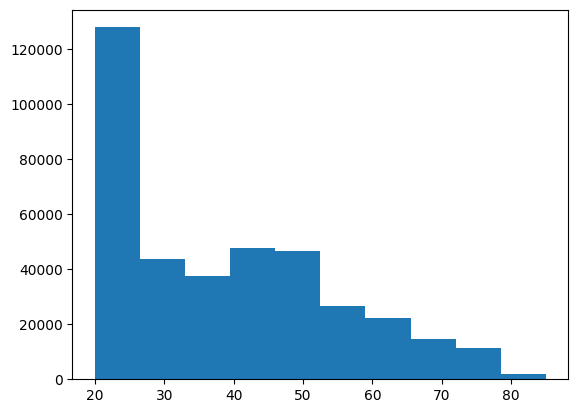

In [33]:
plt.hist(df['Age'])

(array([  2.,   2.,   7.,  44.,  53.,  95., 150., 219., 178.,  62.]),
 array([21. , 27.4, 33.8, 40.2, 46.6, 53. , 59.4, 65.8, 72.2, 78.6, 85. ]),
 <BarContainer object of 10 artists>)

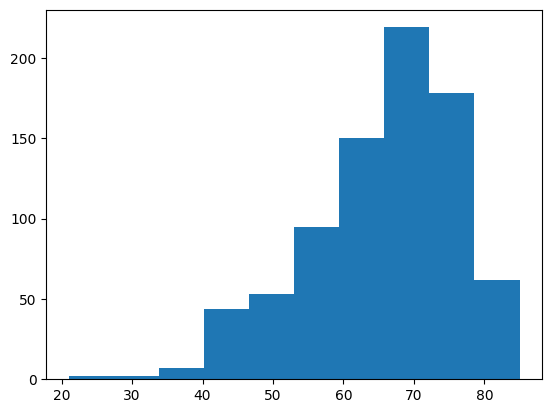

In [34]:
plt.hist(no_license['Age'])

In [35]:
df.loc[(df['Vehicle_Age'] != '< 1 Year') & (df['Vehicle_Age'] != '1-2 Year')]

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male
0,44,True,28.0,False,2.0,True,40454.0,26.0,217,True,True
1,76,True,3.0,False,1.5,False,33536.0,26.0,183,False,True
2,47,True,28.0,False,2.0,True,38294.0,26.0,27,True,True
3,21,True,11.0,True,1.0,False,28619.0,152.0,203,False,True
4,29,True,41.0,True,1.0,False,27496.0,152.0,39,False,False
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,True,26.0,True,1.5,False,30170.0,26.0,88,False,True
381105,30,True,37.0,True,1.0,False,40016.0,152.0,131,False,True
381106,21,True,30.0,True,1.0,False,35118.0,160.0,161,False,True
381107,68,True,14.0,False,2.0,True,44617.0,124.0,74,False,False


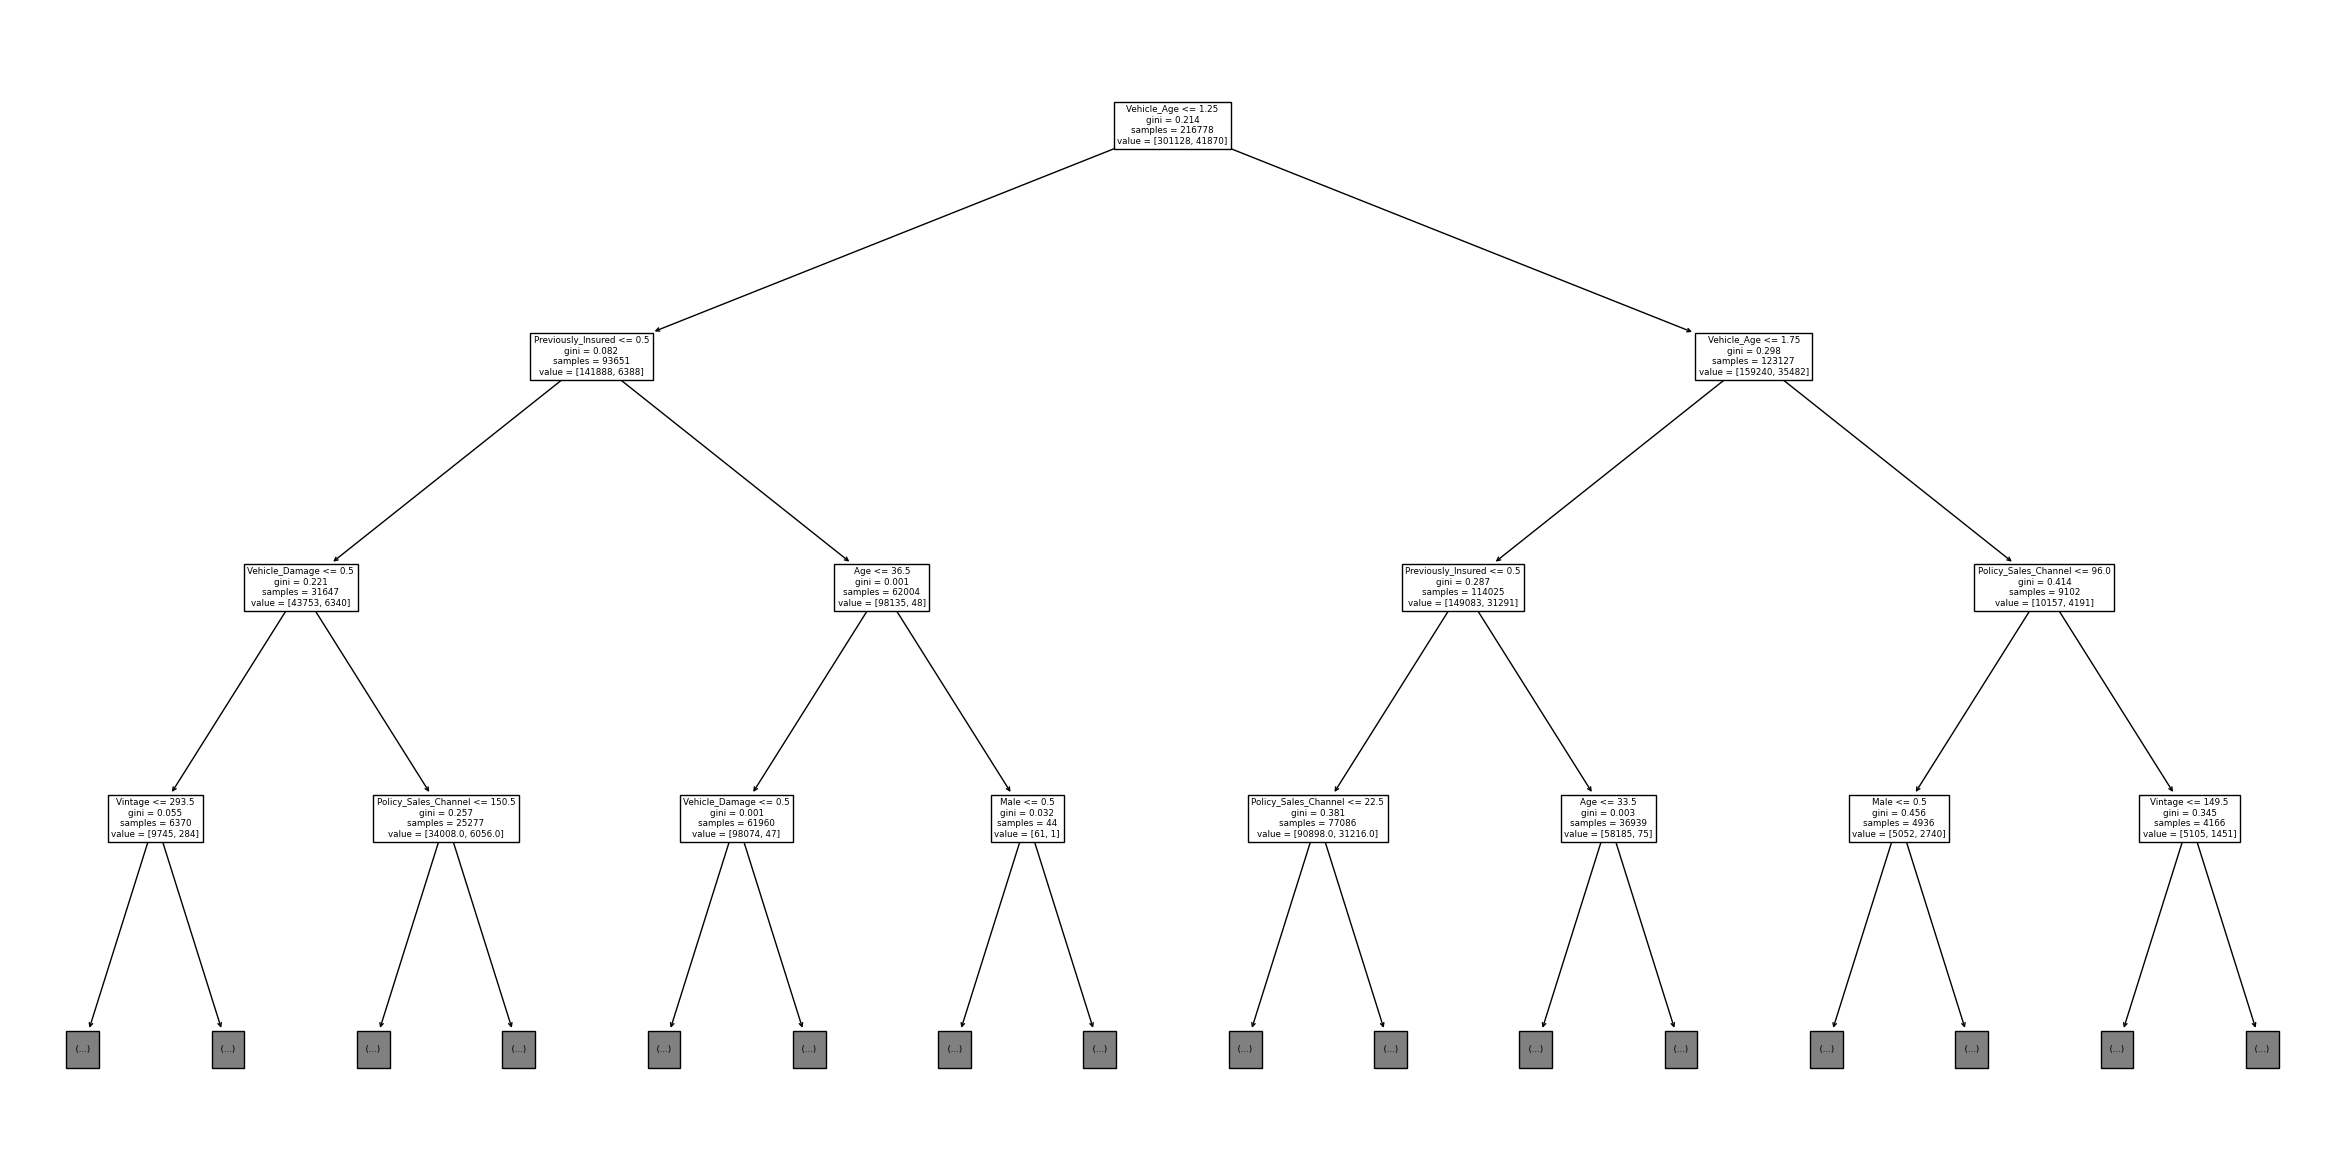

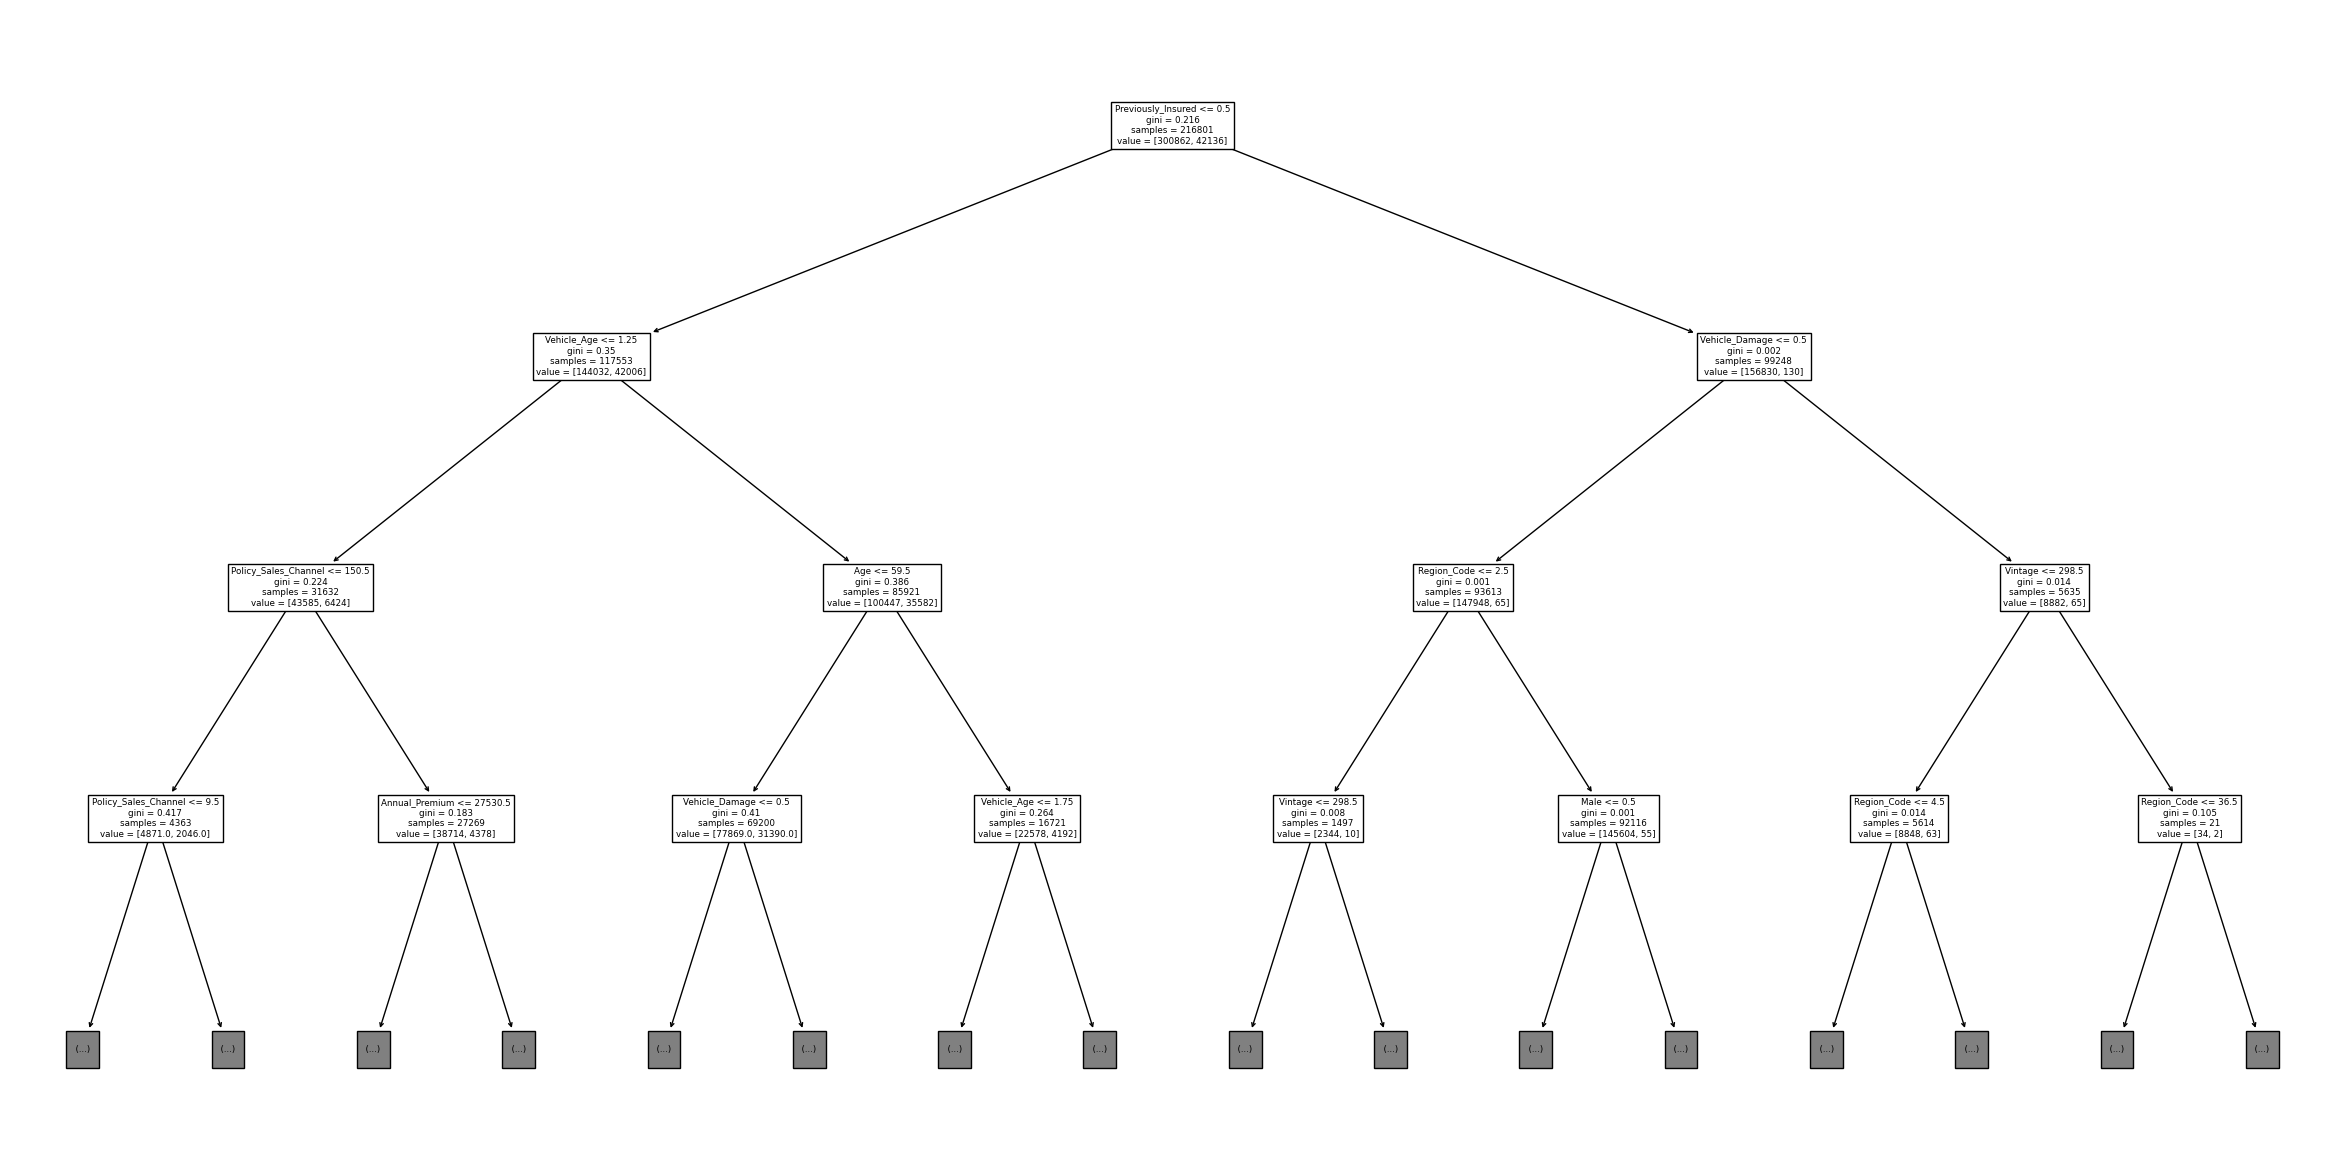

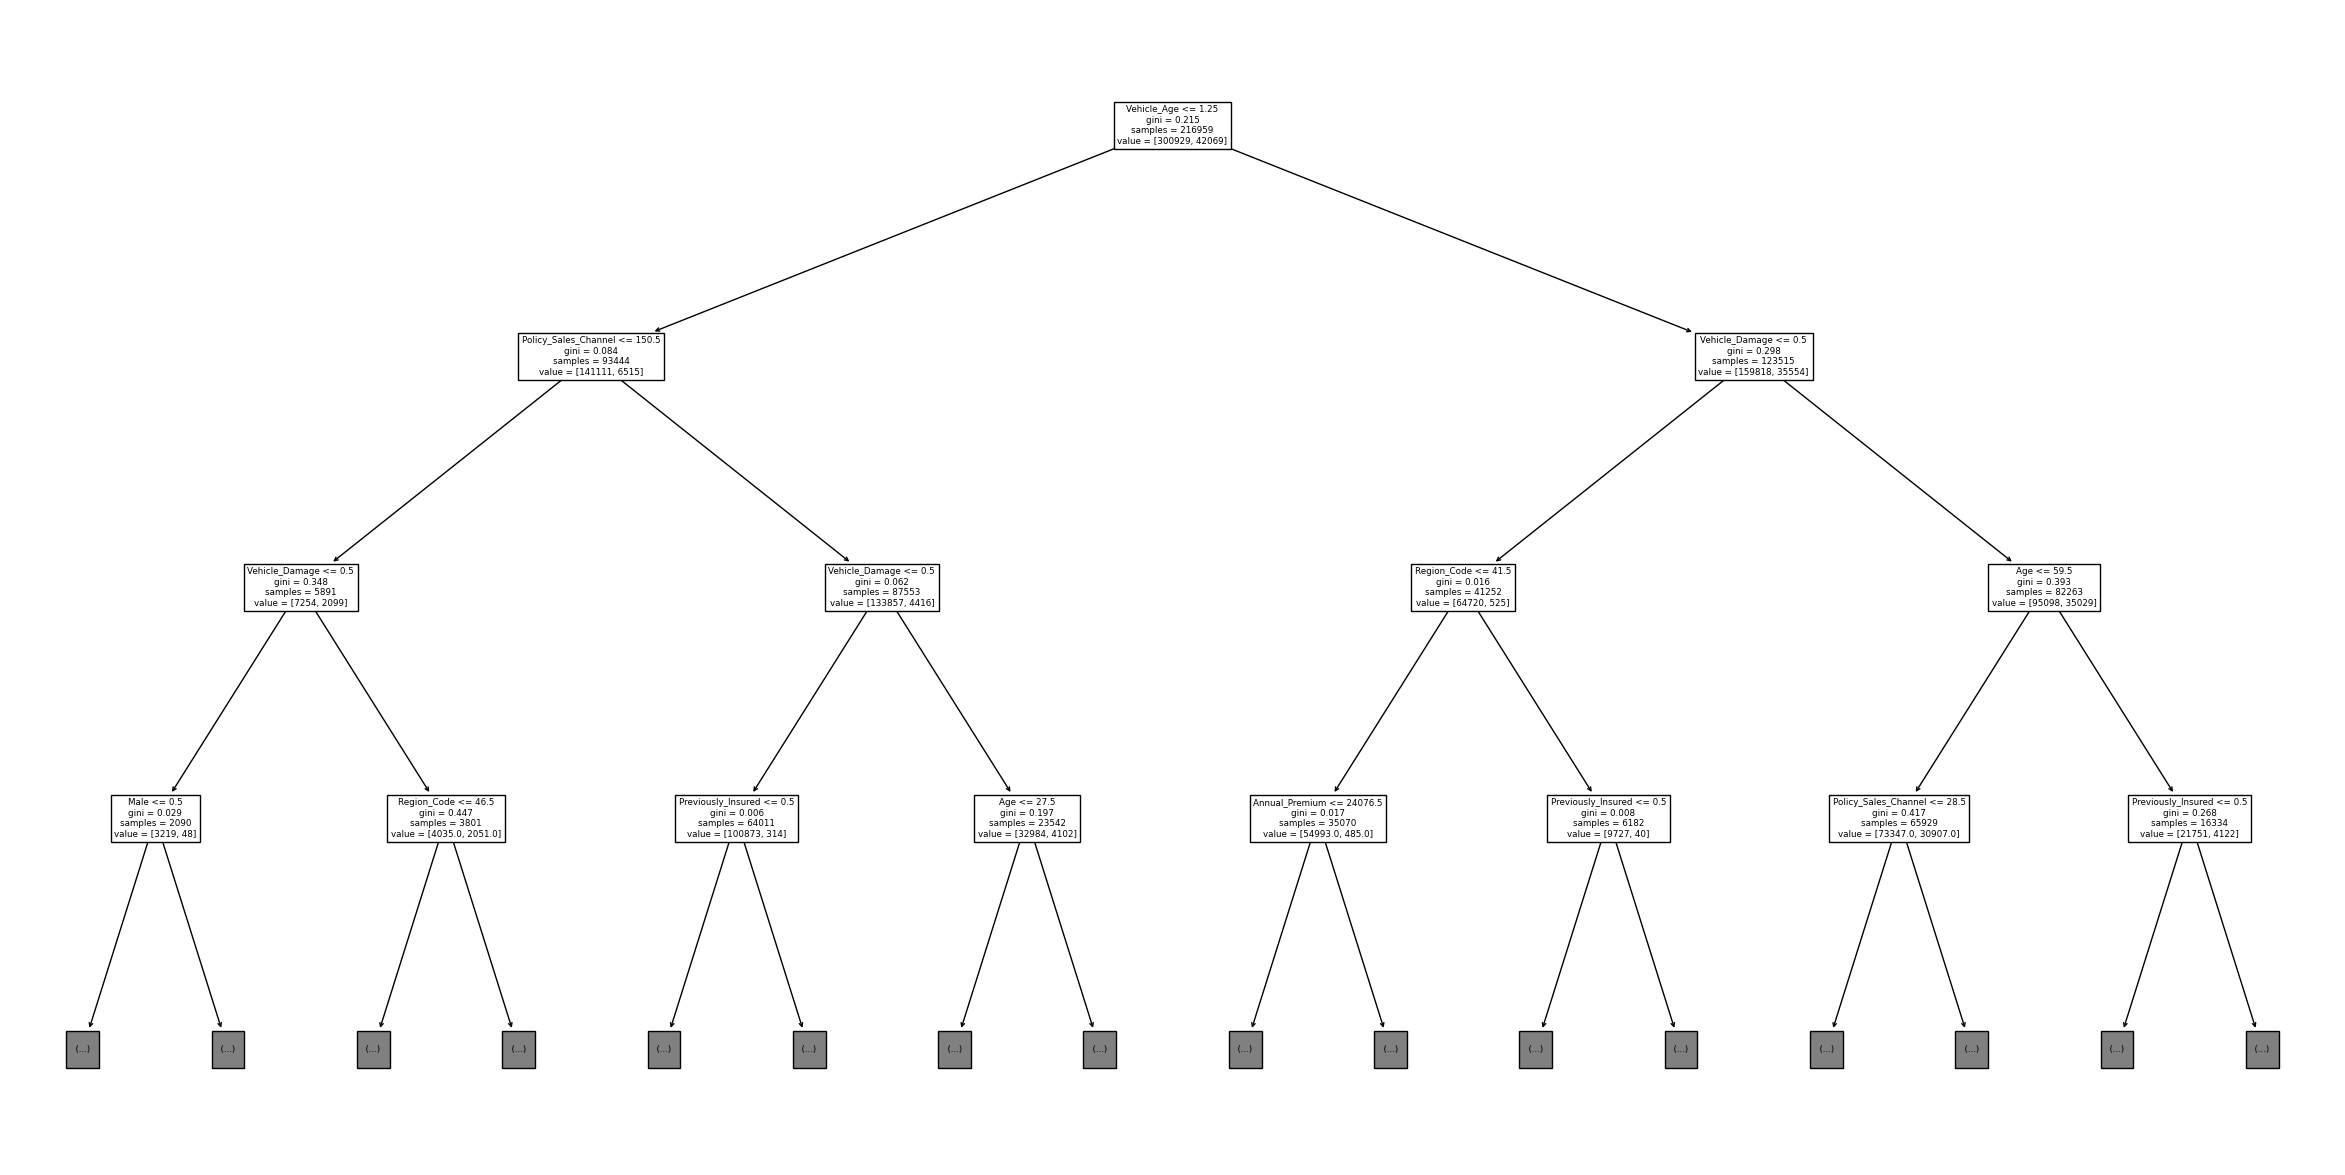

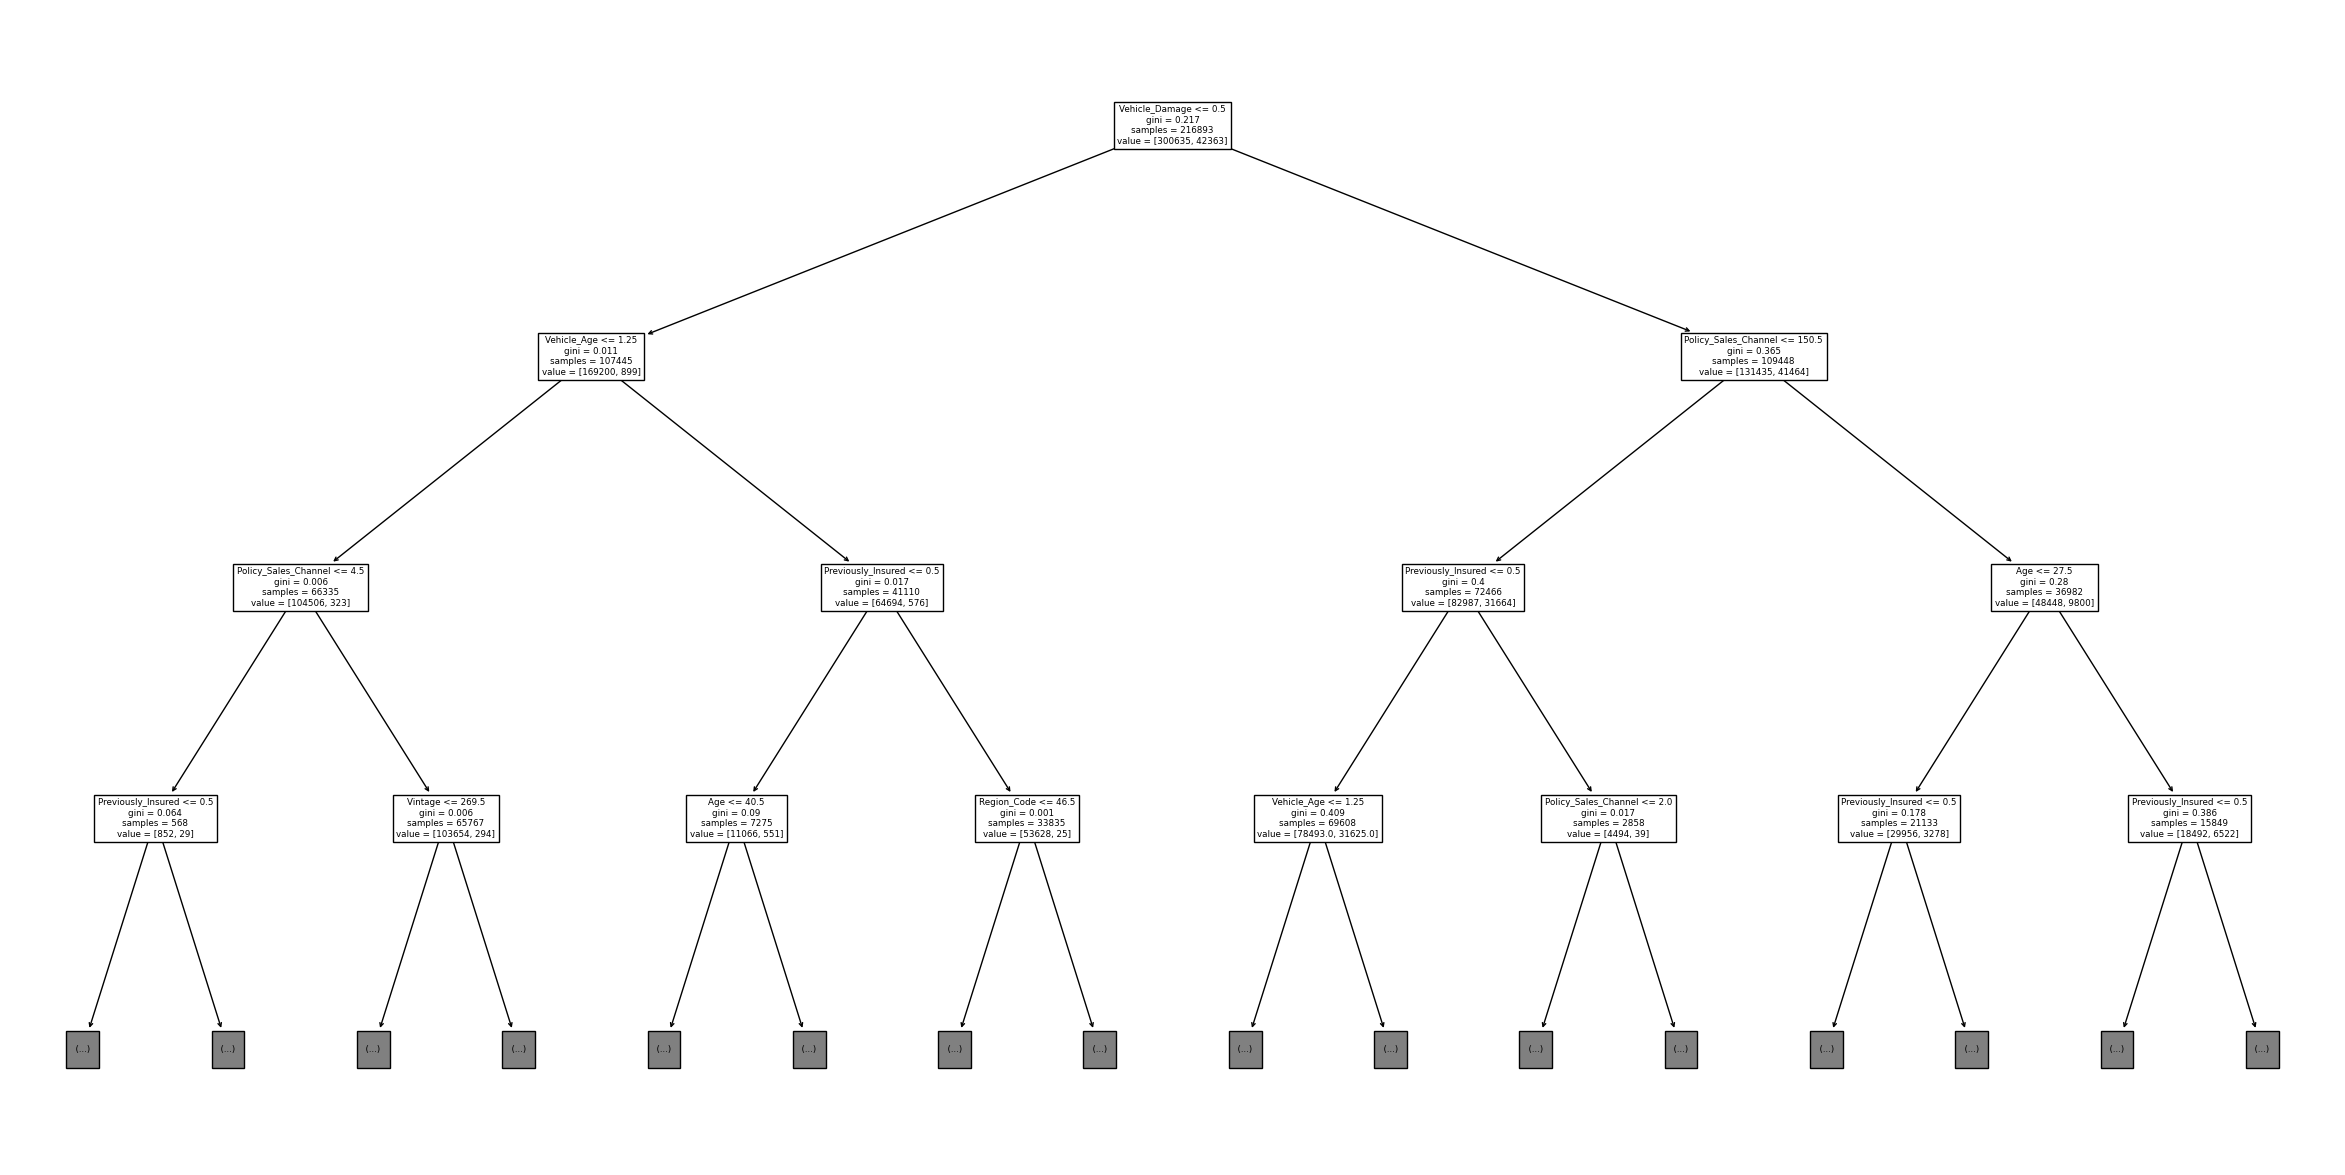

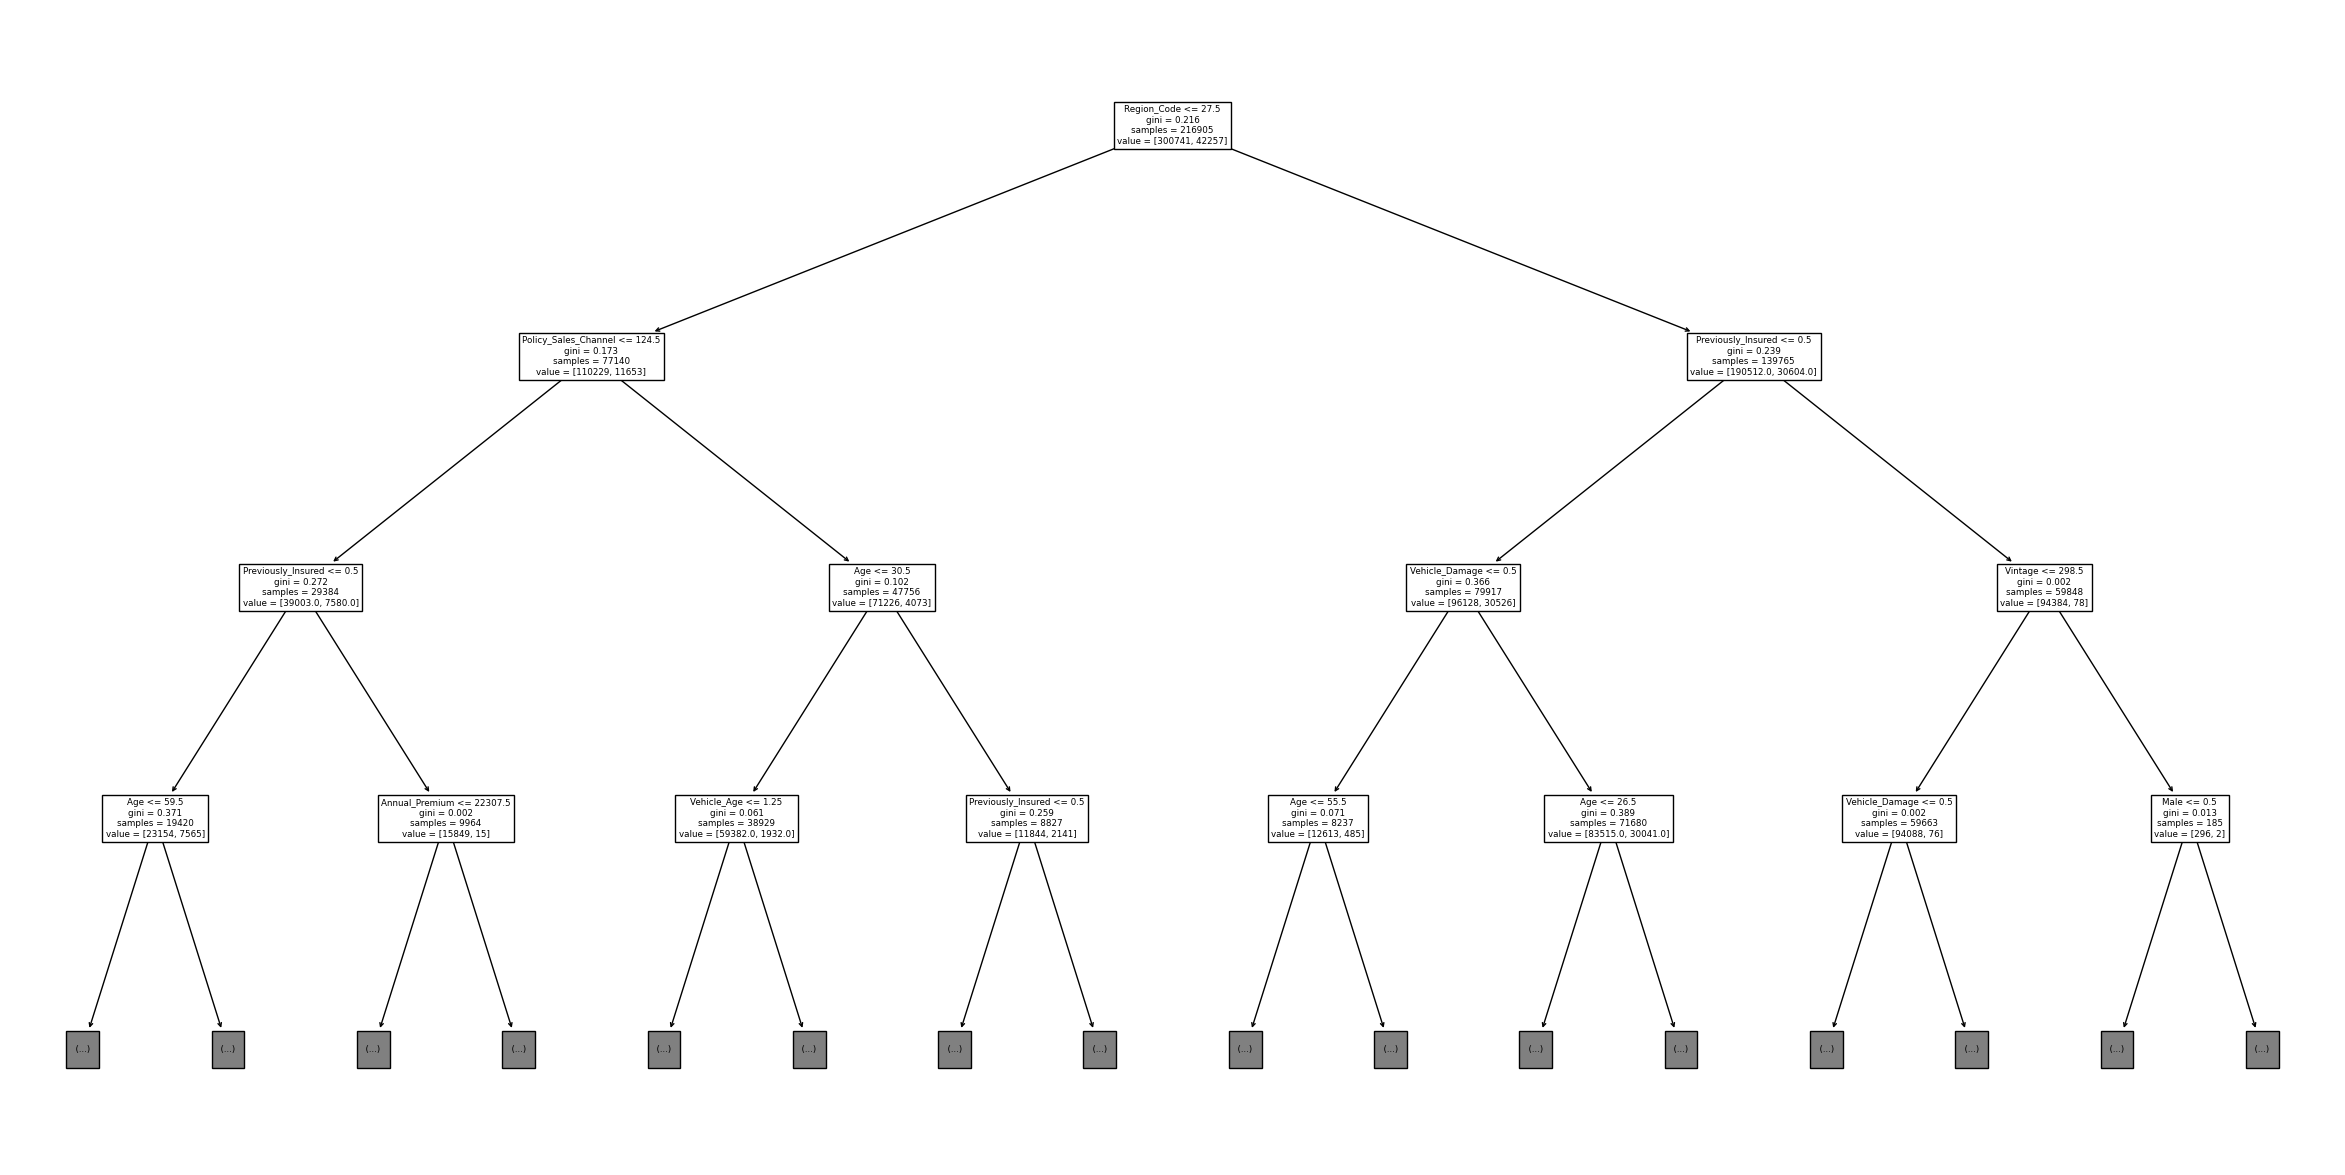

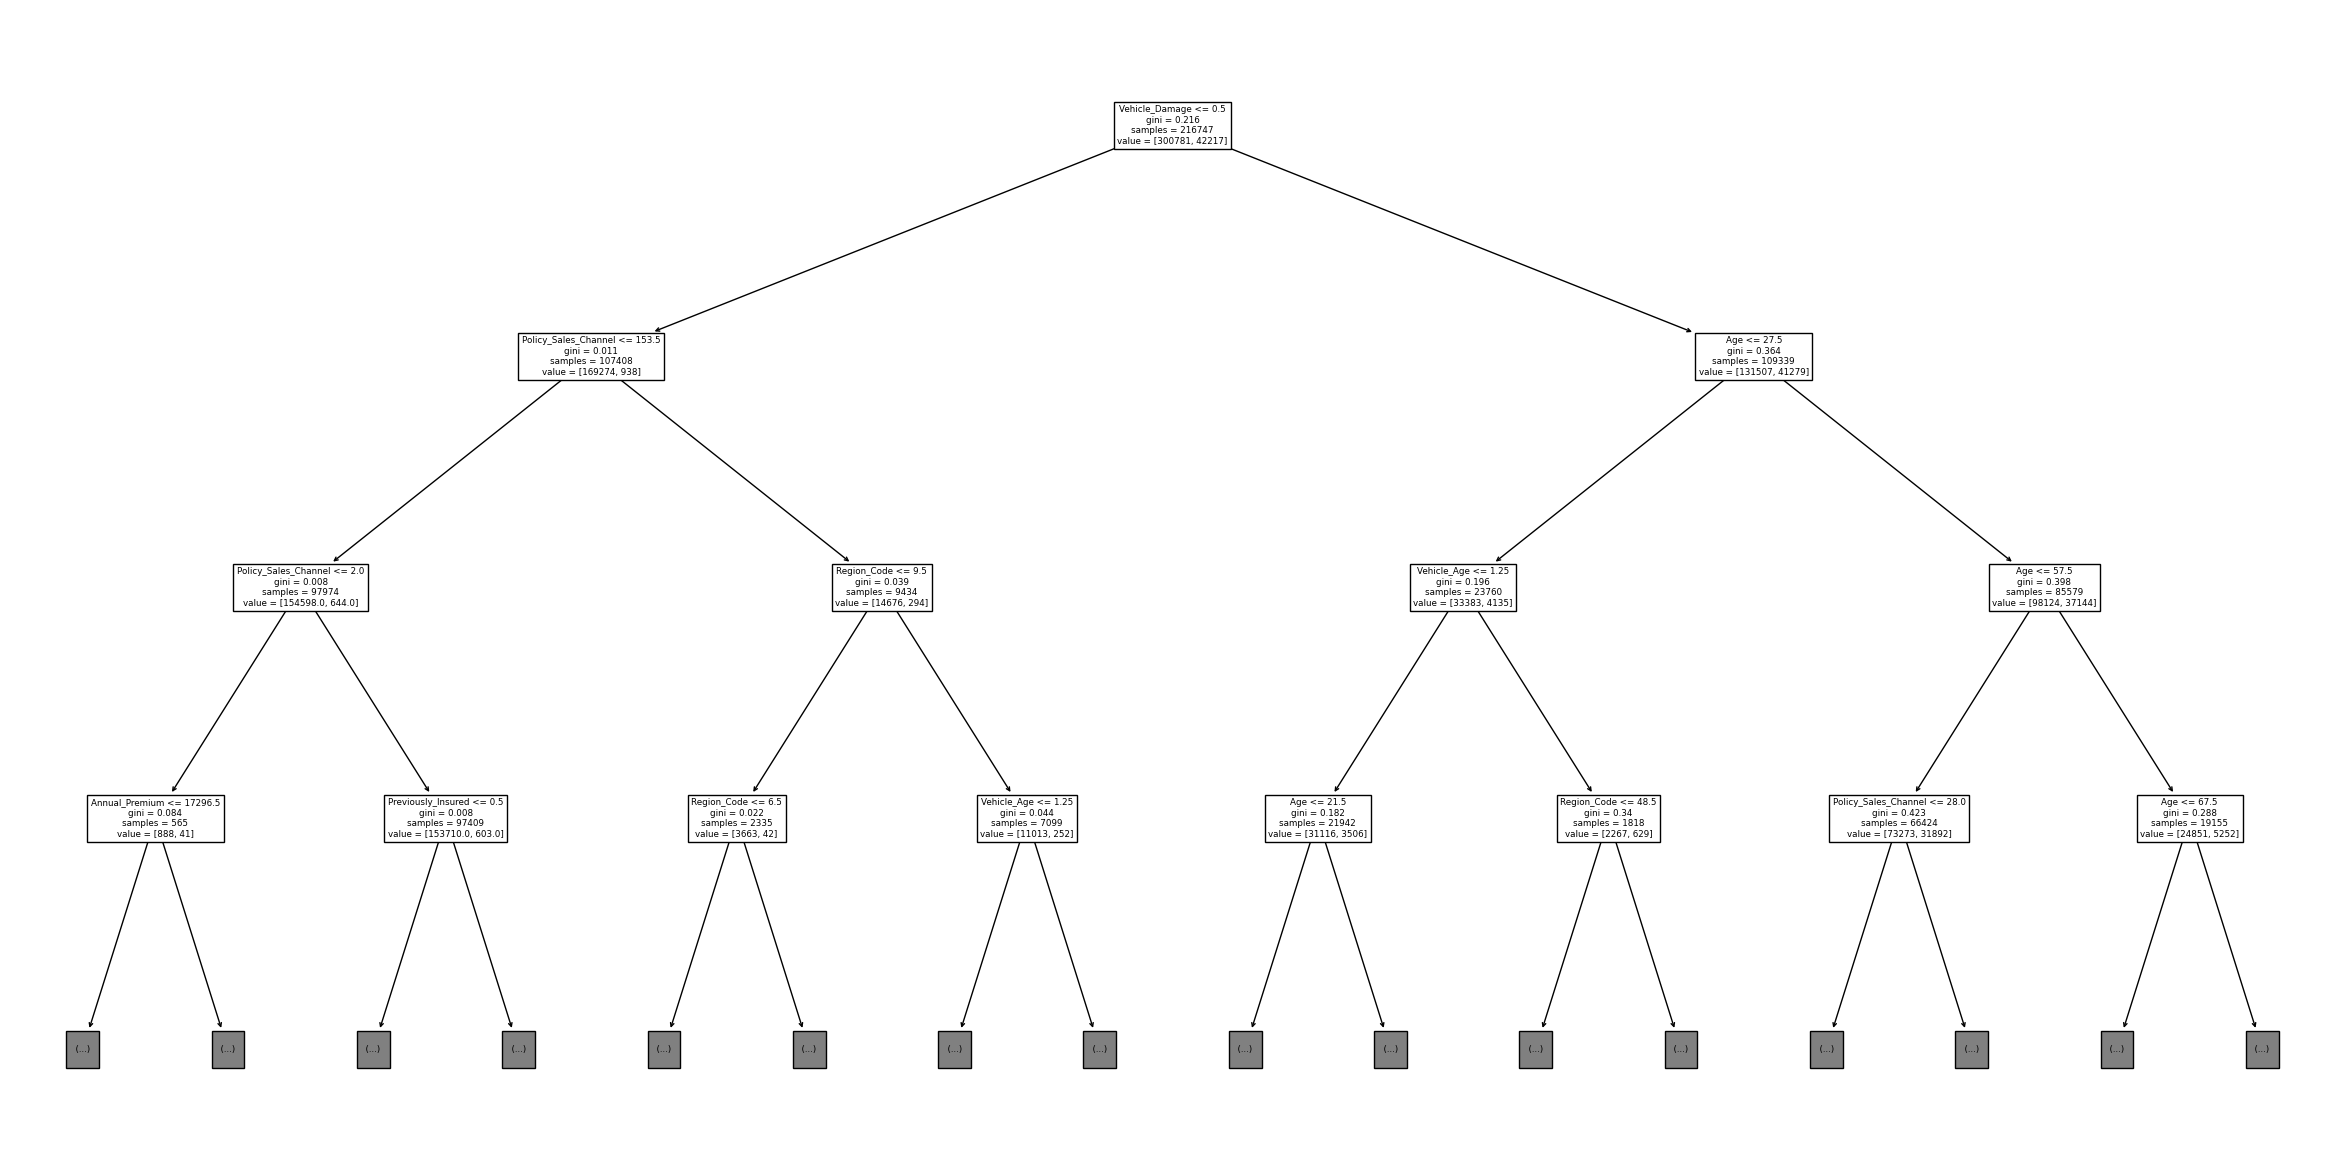

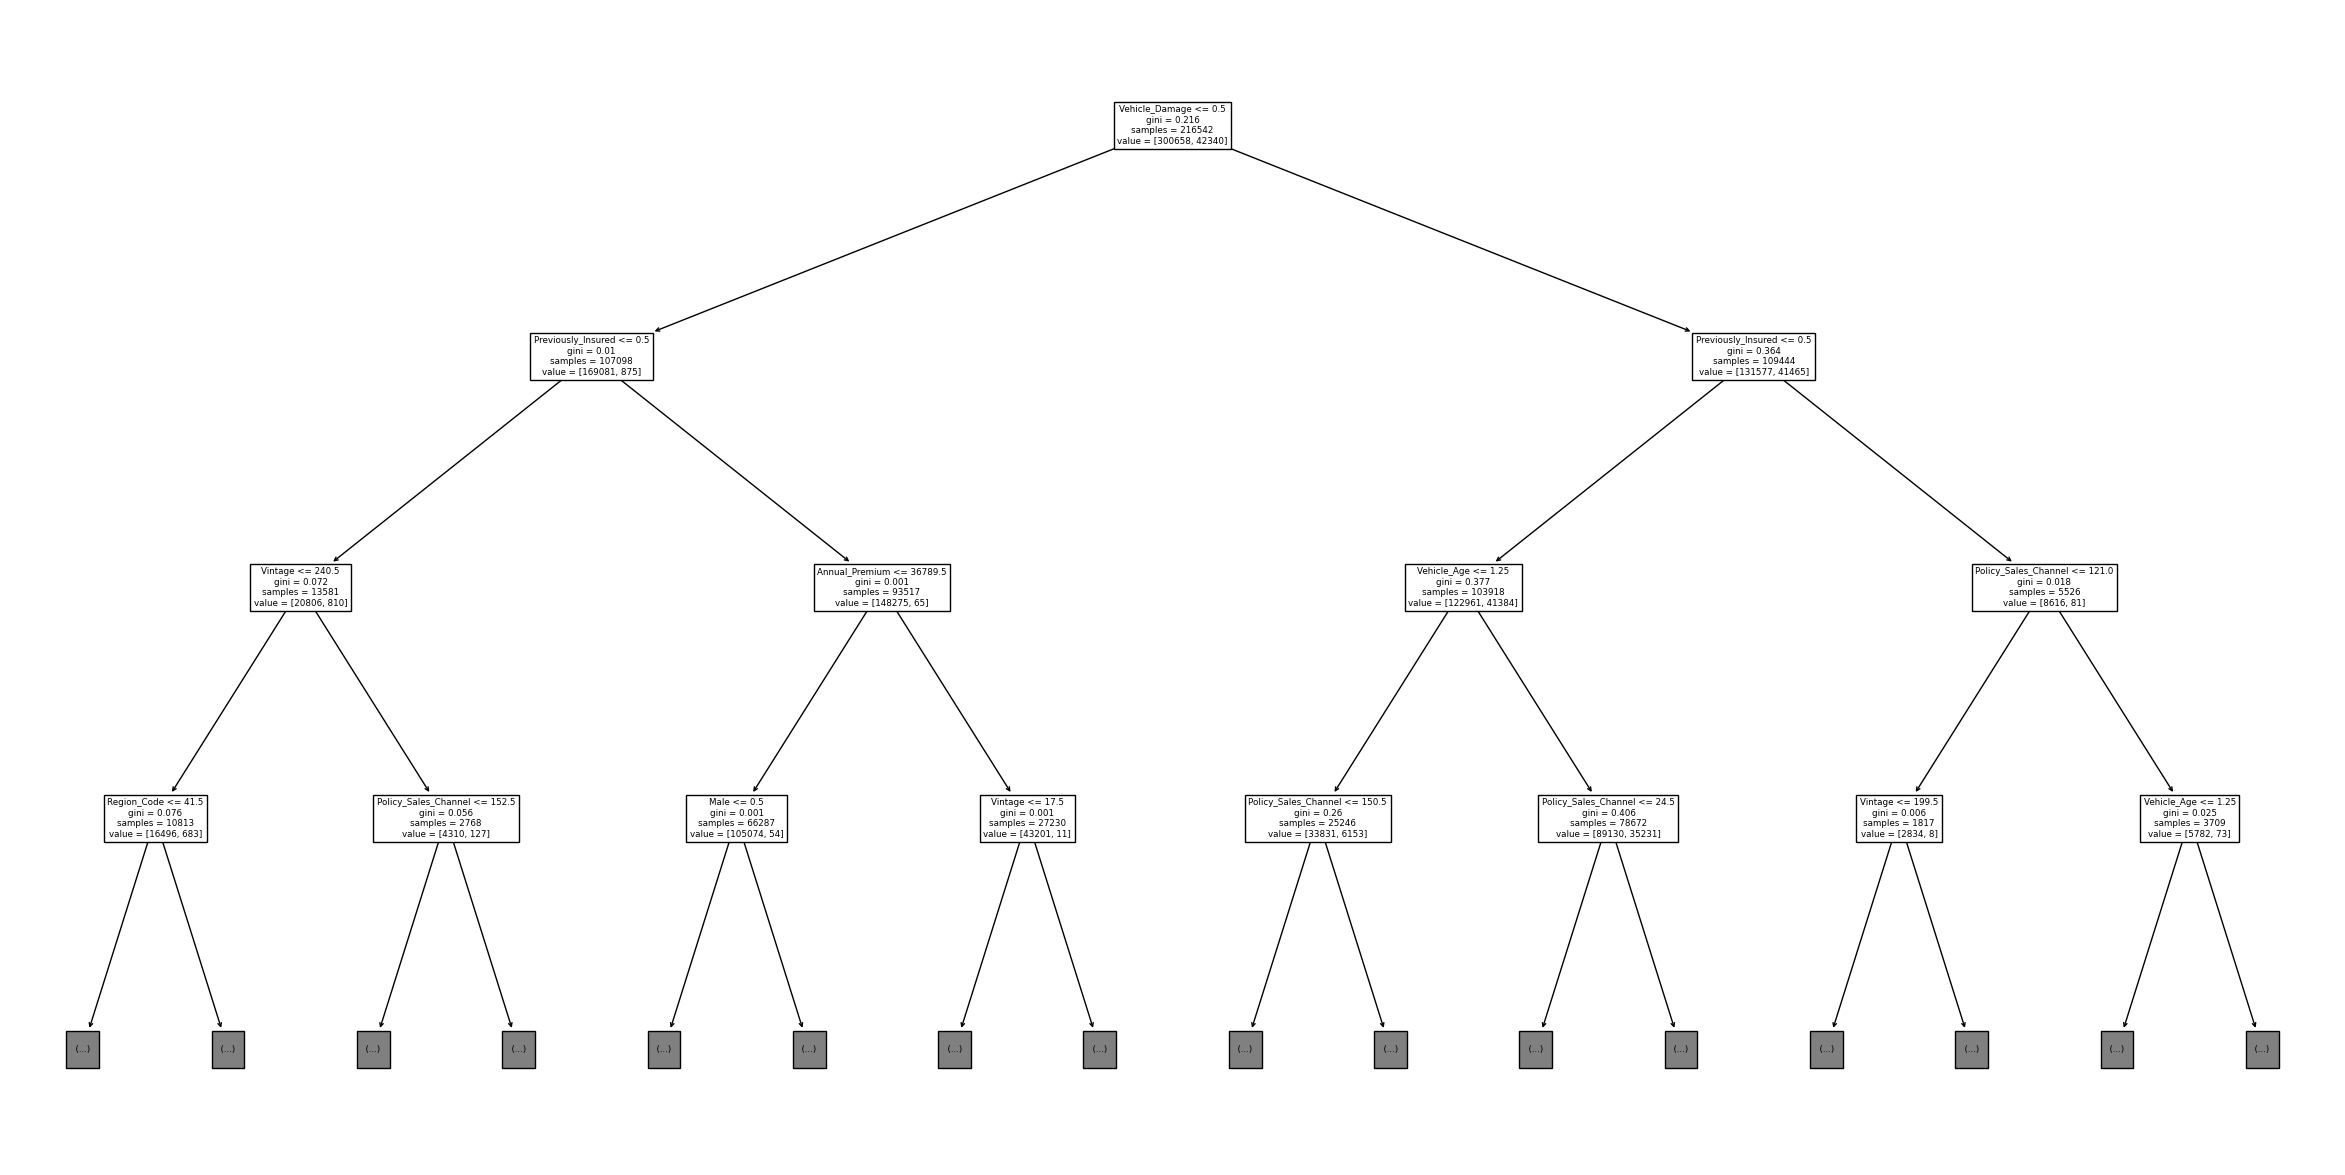

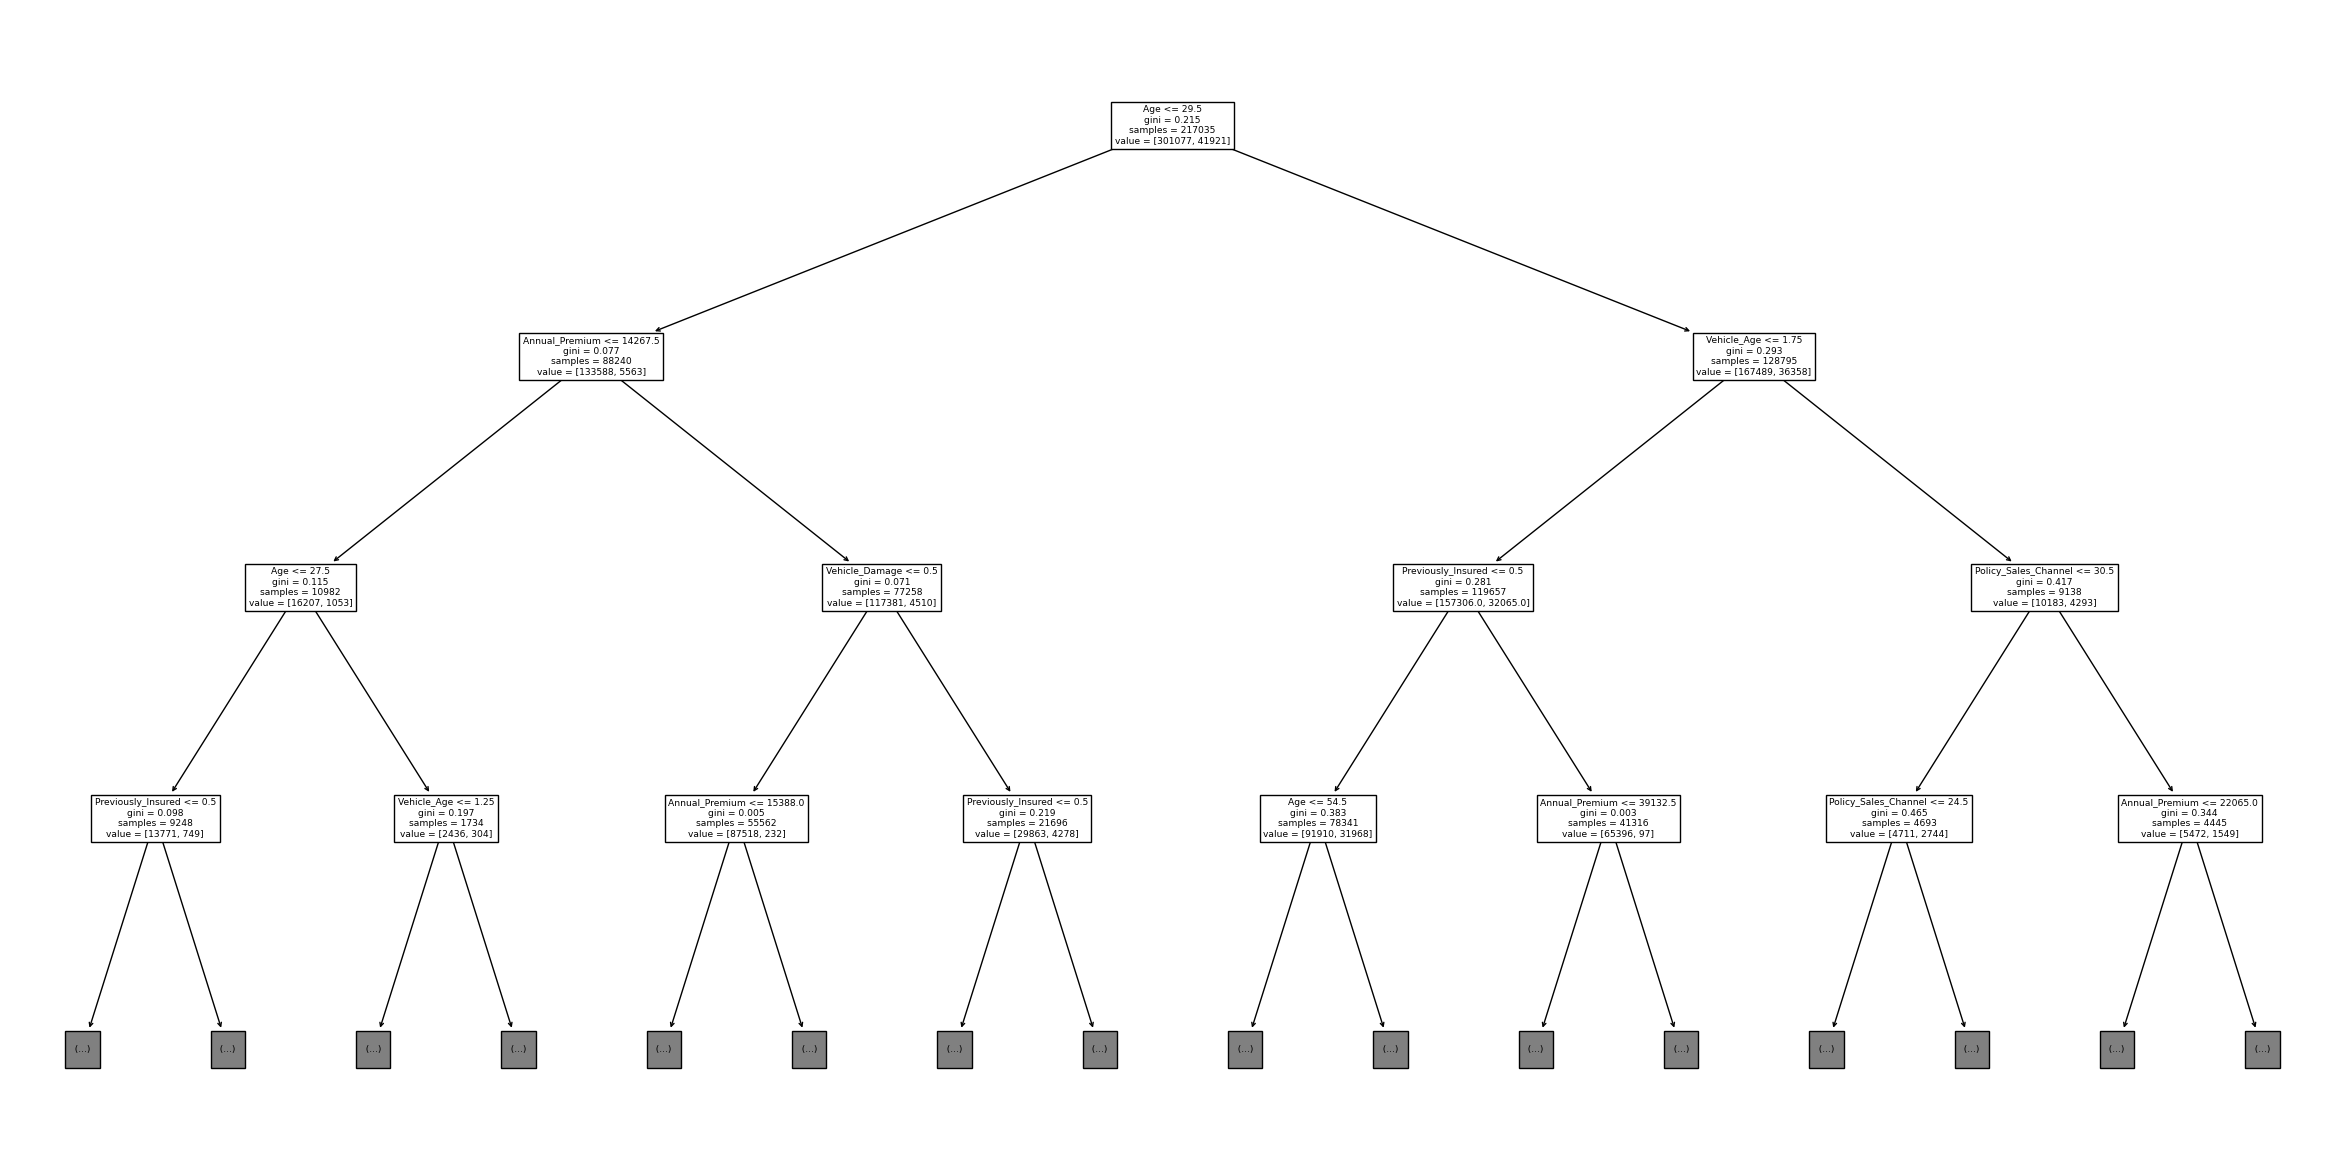

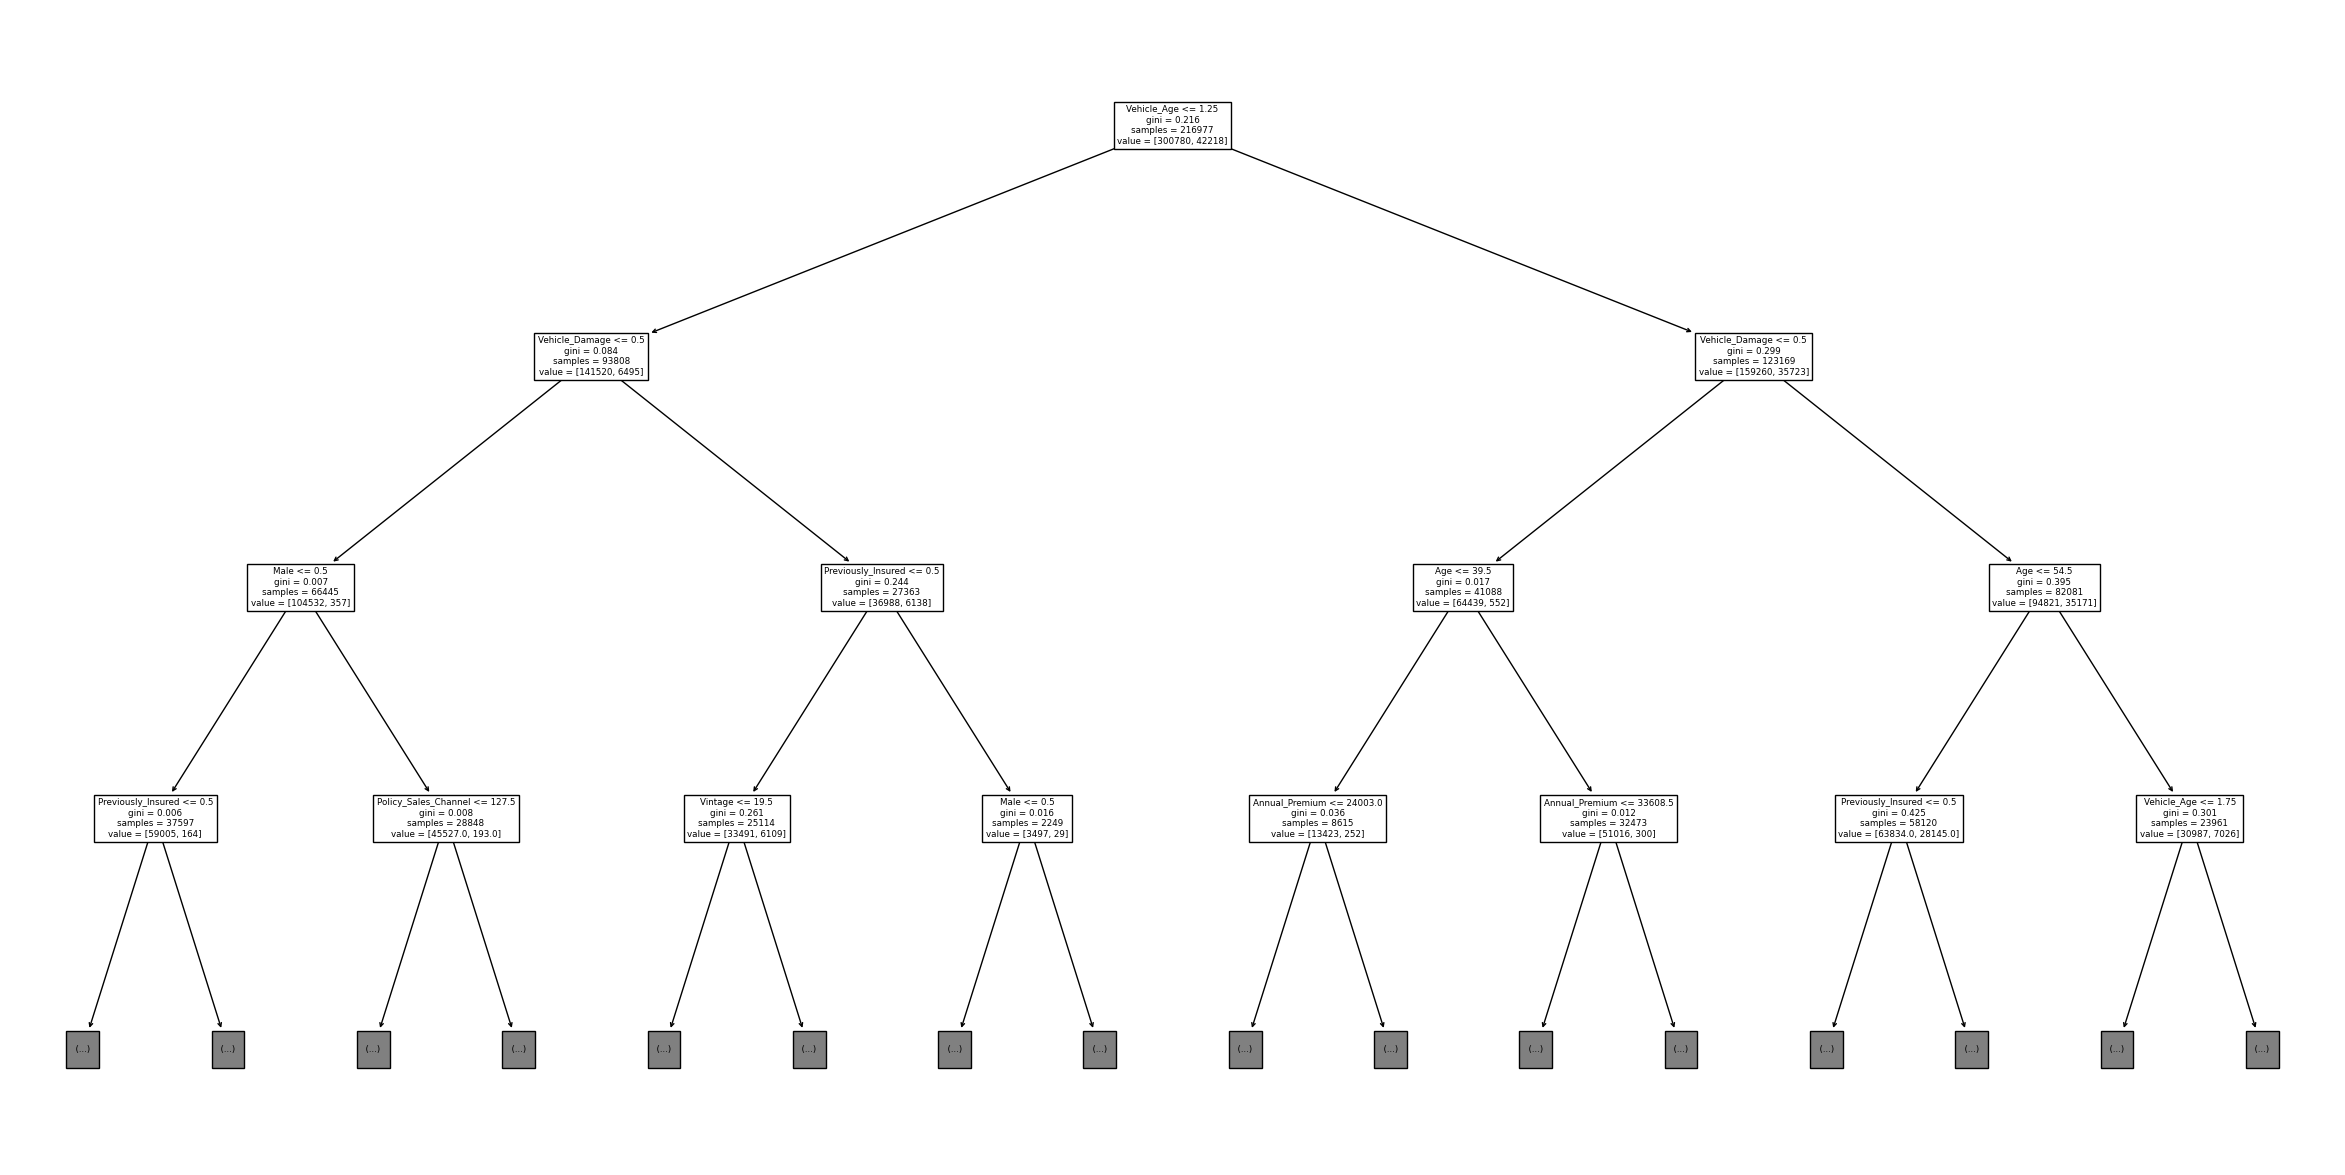

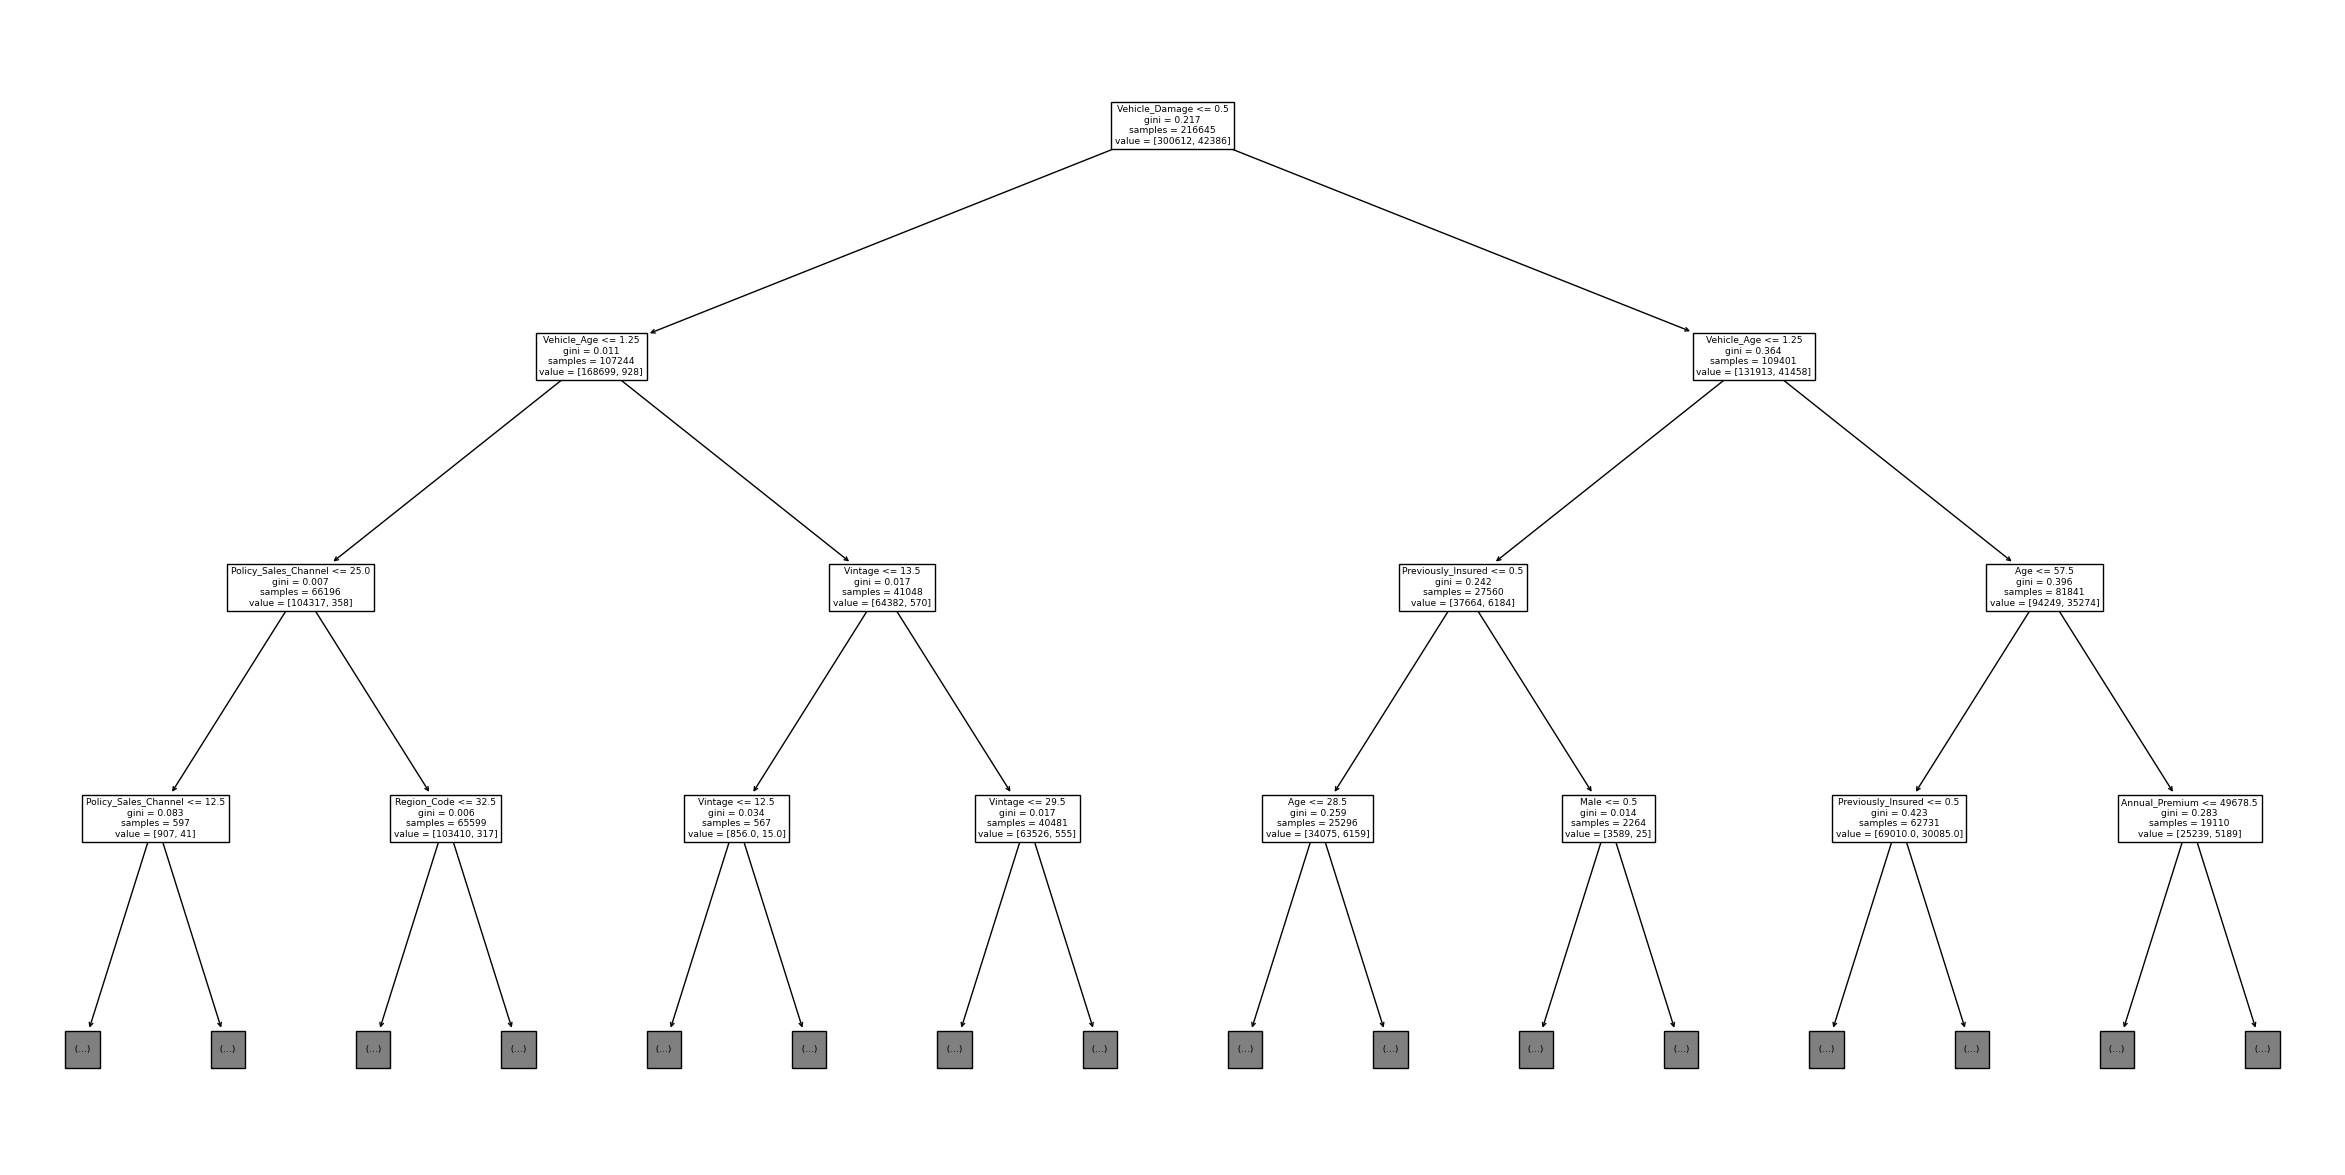

In [36]:
for i in range(10):
    tree = model.estimators_[i]
    plt.figure(figsize=(30,15))
    data = plot_tree(tree,
                           feature_names=features,
                           max_depth=3,)
    plt.show()

(array([34303., 34237., 34494., 34463., 34410., 33949., 34366., 34186.,
        34512., 34078.]),
 array([ 10. ,  38.9,  67.8,  96.7, 125.6, 154.5, 183.4, 212.3, 241.2,
        270.1, 299. ]),
 <BarContainer object of 10 artists>)

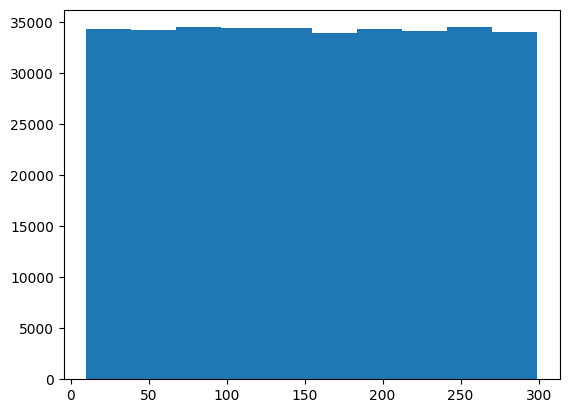

In [37]:
plt.hist(X_train['Vintage'])